<h2>Assignment 2</h2>
<h3>Name: Vanshika Jain<br>Roll No.: BT18CSE107 </h3>

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def hit_or_fit(img,box,k):
#     ERODE
    if k==0:
        return (np.sum(np.multiply(img,box)))==np.sum(box)

#     DILATE
    else:
        mlt=np.multiply(img,box)
        sum=np.sum(mlt)
        if sum>=1:
            return True
        else:
            return False

def dilate(img, struct_element):
    struct_element=struct_element.transpose()
    r,c = img.shape
    result = np.zeros(img.shape,dtype='uint8')
    dx = struct_element.shape[0]//2
    dy = struct_element.shape[1]//2
    
    for i in range (0+dx,r-dx):
        for j in range (0+dy,c-dy):
            if hit_or_fit(img[i-dx:i+dx+1,j-dy:j+dy+1],struct_element,1):
                result[i][j]=1
    
    print('finished dilating')
    return result


def erode(img, struct_element):
    r,c = img.shape
    result = np.zeros(img.shape,dtype='uint8')
    dx = struct_element.shape[0]//2
    dy = struct_element.shape[1]//2

    for i in range (0+dx,r-dx):
        for j in range (0+dy,c-dy):
            if hit_or_fit(img[i-dx:i+dx+1,j-dy:j+dy+1],struct_element,0):
                result[i][j]=1
    
    print('finished eroding')
    return result

def opening(img,element):
    res=np.zeros((img.shape),dtype='uint8')
    res = erode(img,element)
    res = dilate(res,element) 

    print('FINISHED OPENING')
    return res
    
def closing(img,element):
    res=np.zeros((img.shape),dtype='uint8')
    res = dilate(img,element)
    res = erode(res,element)
        
    print('FINISHED CLOSING')
    return res

<span style='color:red'>
1Q. Develop a program that would use appropriate hand coded morphological operations to enhance the given fingerprint.png image as the resultant output image.
</span>

finished eroding
finished dilating
FINISHED OPENING
finished dilating
finished eroding
FINISHED CLOSING


([], <a list of 0 Text yticklabel objects>)

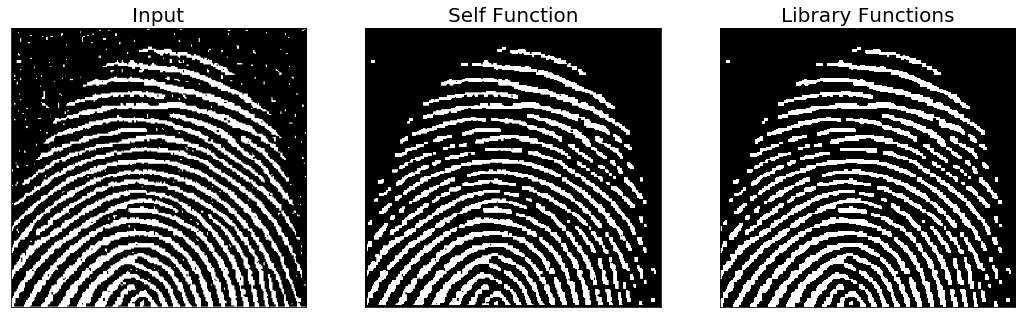

In [2]:
img = cv2.imread('images/fingerprint.png')
img1=img.copy()
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img1 = cv2.threshold(img1,150,255,cv2.THRESH_BINARY)[1]
img1=img1//255

# structuring element
element = np.ones((5,5),dtype='uint8')
# element[1,:]=1
# element[:,1]=1

my_open = opening(img1,element)
my_close = closing(my_open,element)
my_close = cv2.cvtColor(my_close,cv2.COLOR_GRAY2BGR)
fin = np.multiply(img,my_close)

# Library function
lib_open = cv2.morphologyEx(img1,cv2.MORPH_OPEN,element)
lib_close = cv2.morphologyEx(lib_open, cv2.MORPH_CLOSE, element)
lib_close = cv2.cvtColor(lib_close*255,cv2.COLOR_GRAY2BGR)

# Printing
plt.figure(figsize=(18,24))
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('Input', fontsize=20)
plt.xticks([])
plt.yticks([])
plt.subplot(1,3,2)
plt.imshow(fin)
plt.title('Self Function', fontsize=20)
plt.xticks([])
plt.yticks([])
plt.subplot(1,3,3)
plt.imshow(lib_close)
plt.title('Library Functions', fontsize=20)
plt.xticks([])
plt.yticks([])

<span style='color:red'>
2Q. Implement a program to count the number of disks in the image disks.png, which has a number of touching black disks on a white background
</span>

finished eroding
Number of disks: 14


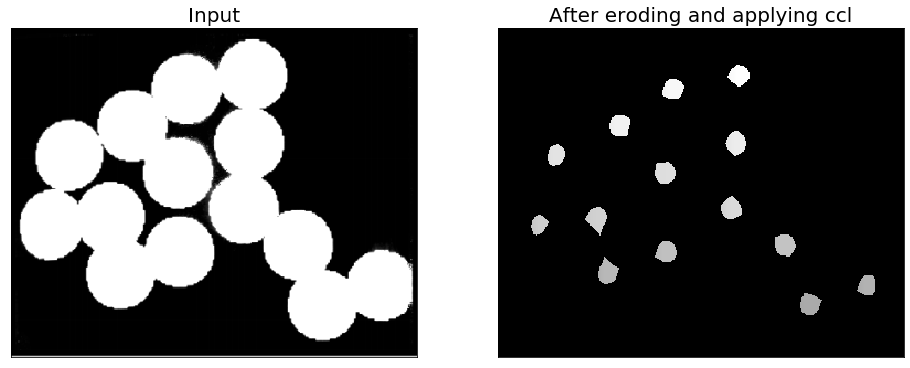

In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def my_ccl(img):
    cc = 0
    r,c = img.shape
#     list which keeps track of equivalence
    li = []
    
    for i in range(r):
        for j in range(c):
            
            if img[i][j] == 0:
                continue
            else:
                if i == 0 and j == 0:
                    cc+=1
                    img[i][j] = cc
                    
                elif i == 0:
                    if img[i][j-1] == 0:
                        cc+=1
                        img[i][j] = cc
                    else:
                        img[i][j] = img[i][j-1]
                        
                elif j == 0:
                    if img[i-1][j] == 0:
                        cc+=1
                        img[i][j] = cc
                    else:
                        img[i][j] = img[i-1][j]
                else:
                    if img[i-1][j] == 0 and img[i][j-1] == 0:
                        cc+=1
                        img[i][j] = cc
                        
                    elif img[i-1][j] >= 1 and img[i][j-1] >= 1:
                        if img[i-1][j] == img[i][j-1]:
                            img[i][j] = img[i-1][j]
                        else:
                            img[i][j] = min(img[i-1][j], img[i][j-1])
                            a = img[i][j]
                            b = max(img[i-1][j], img[i][j-1])
                            
                            if (a,b) not in li:
                                li.append((a,b))
                    else:
                        img[i][j] = max(img[i][j-1], img[i-1][j])
    return img, li, cc

# Union sets to find the parents and for renaming of cc points
def find_parent(parent, i):
    if parent[i-1] == -1:
        return i
    else:
        return find_parent(parent, parent[i-1])

def finding_equivalence(li, cc):
    parent = [-1]*cc
    
    li.sort()
    for (i,j) in li:
        parent[j-1] = find_parent(parent, i)
    
    return parent


img = cv2.imread('images/disks.png')

img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = 255-img
img1=img.copy()
img1 = cv2.threshold(img1,150,255,cv2.THRESH_BINARY)[1]
img1=img1//255

res=np.zeros((img.shape),dtype='uint8')

# defining the structuring element and eroding using it to separate out the disks
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(45,45))
res = erode(img1,element)

img2, li, cc = my_ccl(res)

parent = finding_equivalence(li, cc)
count = 0
for i in parent:
    if i == -1:
        count+=1

# Printing
plt.figure(figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Input', fontsize=20)
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(img2*255, cmap = "gray")
plt.title('After eroding and applying ccl', fontsize=20)
plt.xticks([])
plt.yticks([])

print('Number of disks:', count)

<span style='color:red'>
3Q. a) Implement a Myrgb2hsi function to convert red-green-blue (RGB) colors to hue saturation intensity(HSI).
</span>

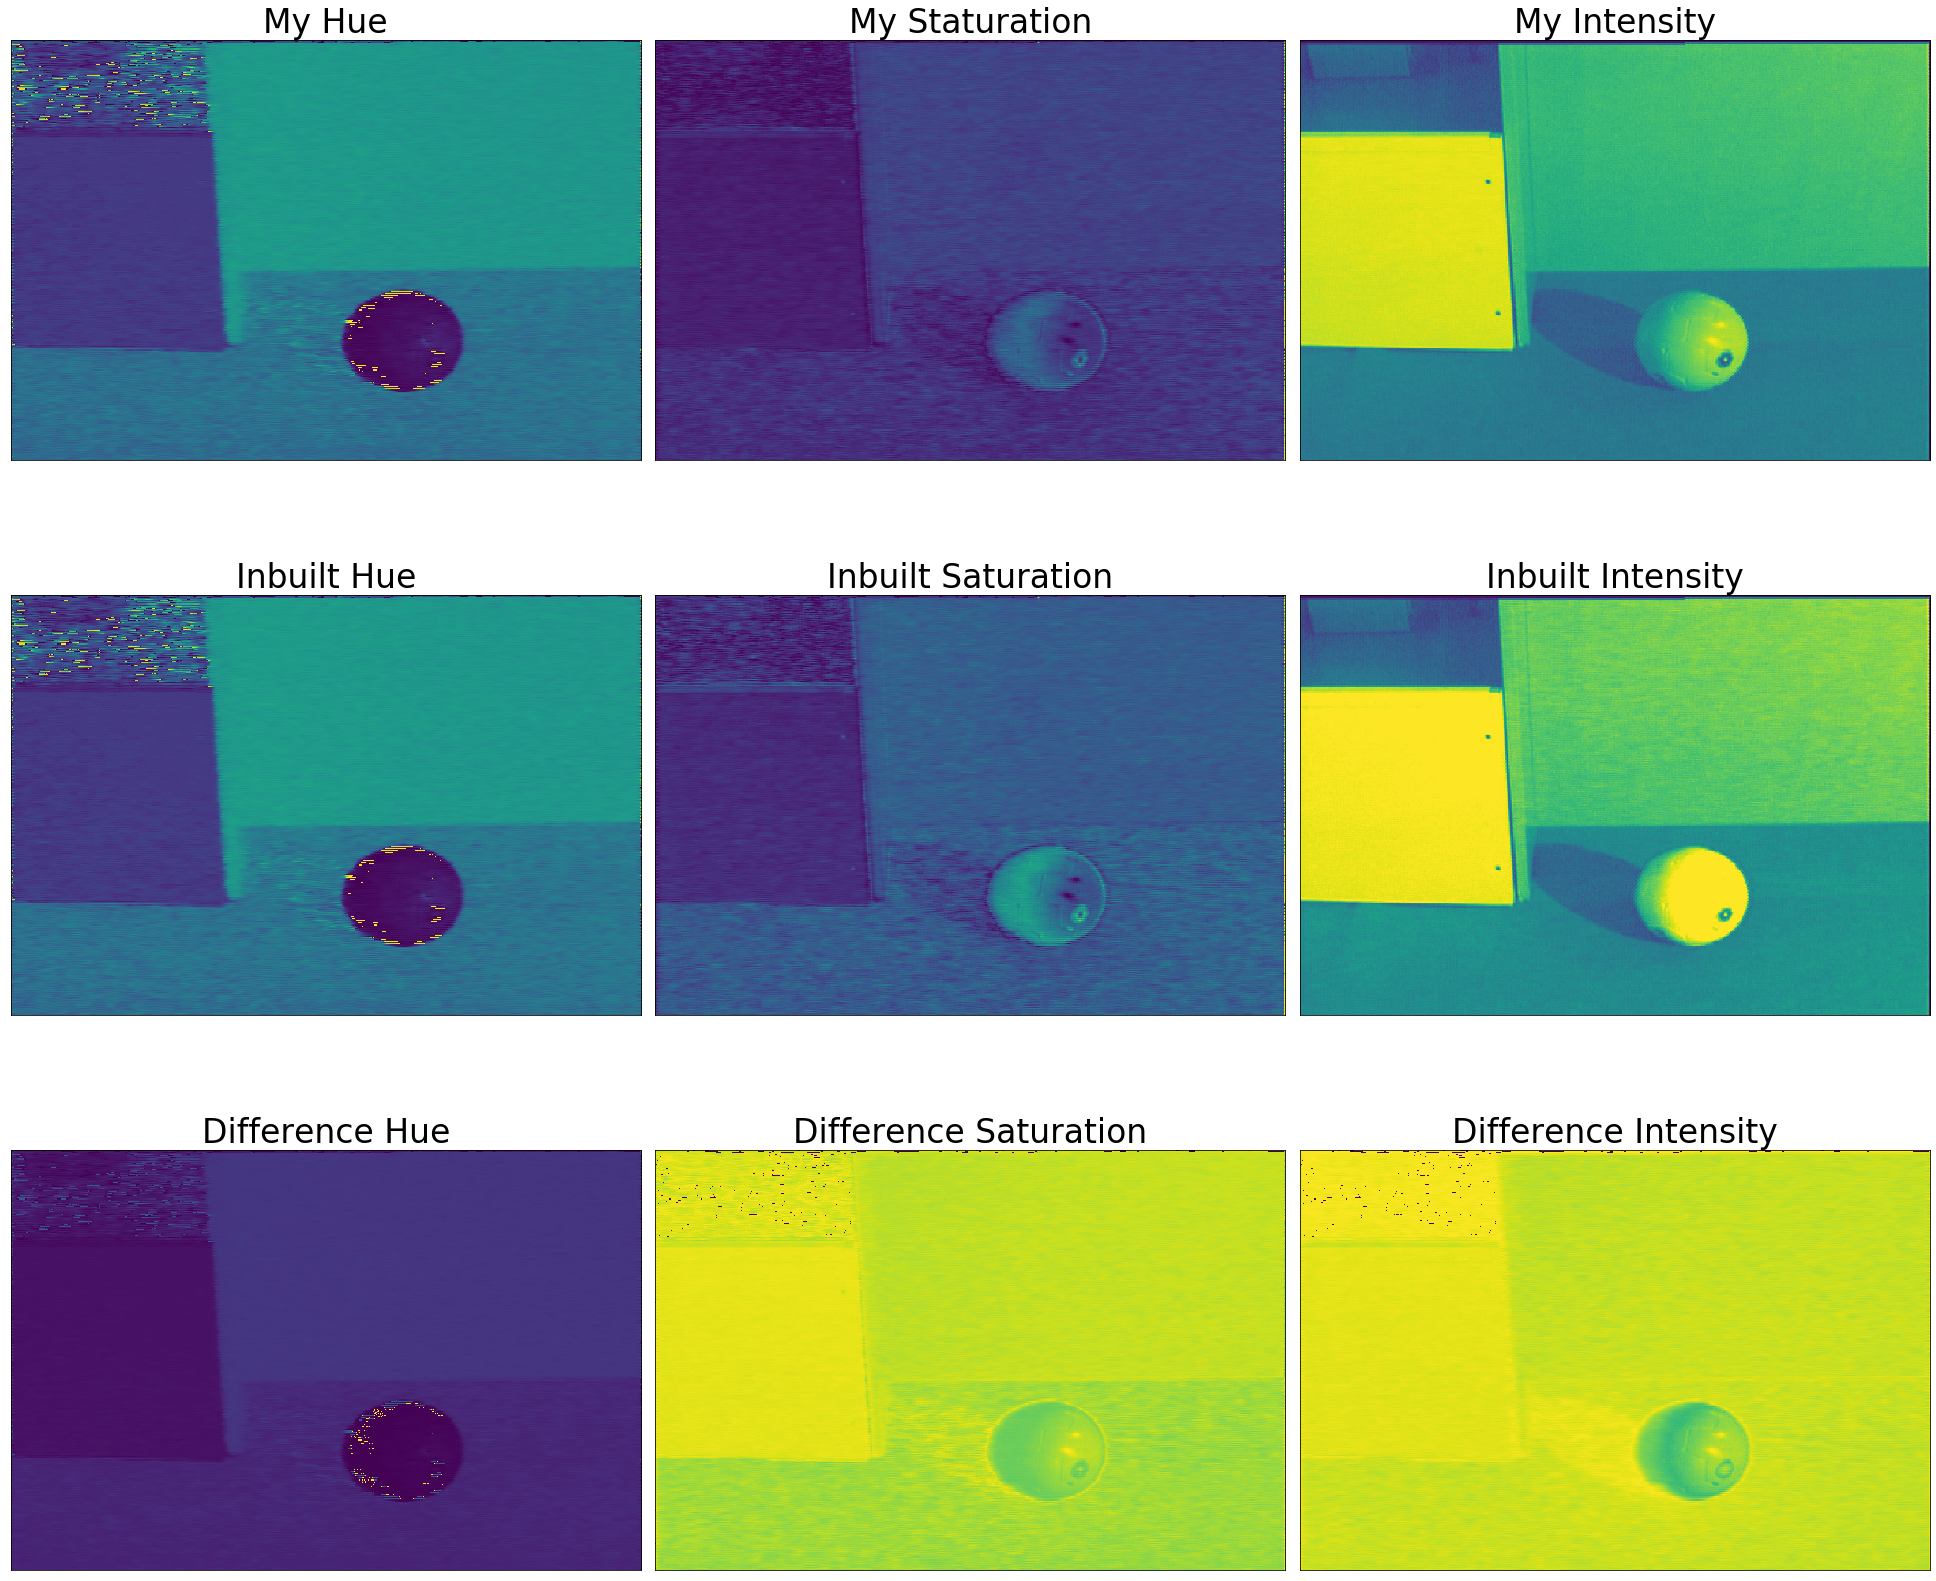

In [4]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


def Myrgb2hsi(img):
    img1=img.copy()
    b,g,r=cv2.split(img1)
    b=b/255
    g=g/255
    r=r/255
    rows,cols = b.shape
#     new values
    hue,sat,intensity=0,0,0
    
    for i in range (rows):
        for j in range (cols):
            num=0.5 * ((r [i, j] -g [i, j]) + (r [i, j] -b [i, j]))
            den=np.sqrt((r [i, j] -g [i, j]) ** 2 + (r [i, j] -b [i, j]) * (g [i, j] -b [i, j]))
            
            theta=0
            if den!=0:
                theta=float(np.arccos(num/den))
            
#             Hue
            if den == 0:
                h=0
            elif b [i, j]<= g [i, j]:
                h=theta
            else:
                h=2 * 3.14169265-theta
            
            min_rgb=min(b [i, j], g [i, j], r [i, j])
            sums =b [i, j] + g [i, j] + r [i, j]
            
#             Saturation
            if sums == 0:
                sat=0
            else:
                sat=1-3 * min_rgb/sums
                
            hue=h/(2 * 3.14159265)
            intensity=sums/3.0
            
#           Output hsi image, expand to 255 for easy display
#           h component is between [0,2pi] and s and i are between [0,1]
            img1[i,j,0]=hue * 255
            img1[i,j,1]=sat * 255
            img1[i,j,2]=intensity * 255

    return img1


img = cv2.imread('images/ball.bmp')
img1=Myrgb2hsi(img)

h,s,i = cv2.split(img1)

inbuilt_hsi = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
inbuilt_h, inbuilt_s,inbuilt_i = cv2.split(inbuilt_hsi)

# Printing
plt.figure(figsize=(27,24))
plt.subplot(3, 3, 1)
plt.title("My Hue", fontsize=33)
plt.imshow(h)
plt.xticks([])
plt.yticks([])

plt.subplot(3, 3, 2)
plt.title("My Staturation", fontsize=33)
plt.imshow(s)
plt.xticks([])
plt.yticks([])

plt.subplot(3, 3, 3)
plt.title("My Intensity", fontsize=33)
plt.imshow(i)
plt.xticks([])
plt.yticks([])

plt.subplot(3, 3, 4)
plt.title("Inbuilt Hue", fontsize=33)
plt.imshow(inbuilt_h)
plt.xticks([])
plt.yticks([])

plt.subplot(3, 3, 5)
plt.title("Inbuilt Saturation", fontsize=33)
plt.imshow(inbuilt_s)
plt.xticks([])
plt.yticks([])

plt.subplot(3, 3, 6)
plt.title("Inbuilt Intensity", fontsize=33)
plt.imshow(inbuilt_i)
plt.xticks([])
plt.yticks([])

plt.subplot(3, 3, 7)
plt.title("Difference Hue", fontsize=33)
plt.imshow(h - inbuilt_h)
plt.xticks([])
plt.yticks([])

plt.subplot(3, 3, 8)
plt.title("Difference Saturation", fontsize=33)
plt.imshow(s - inbuilt_s)
plt.xticks([])
plt.yticks([])

plt.subplot(3, 3, 9)
plt.title("Difference Intensity", fontsize=33)
plt.imshow(i - inbuilt_i)
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

<span style='color:red'>
3Q. b) In H-space, find a threshold for the ball. Find the centroid of the ball and indicate its location by a cross on the original color image.
</span>

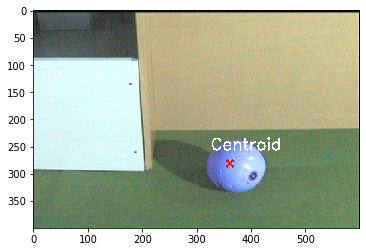

In [5]:
img = cv2.imread('images/ball.bmp')

h_thresholded = cv2.threshold(h,25,255,cv2.THRESH_BINARY)[1]
h_thresholded = 255 - h_thresholded
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(51,51))

lib_open = cv2.morphologyEx(h_thresholded,cv2.MORPH_OPEN,element)
lib_close = cv2.morphologyEx(lib_open, cv2.MORPH_CLOSE, element)

# Marking Centroid
M = cv2.moments(lib_close)
 
# calculating x,y coordinate of center

cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])


# Putting text and highlighting the center
cv2.line(img, (cX-5, cY-5),(cX+5, cY+5), (255, 0, 0), 3)
cv2.line(img, (cX+5, cY-5),(cX-5, cY+5), (255, 0, 0), 3)
cv2.putText(img, "Centroid", (cX - 35, cY - 25),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

plt.imshow(img)

<span style='color:red'>
4Q. Develop a function to implement Harris corners detection algorithm. Use the function to detect corner
points in the given corner_test.png image. Compare the hand crafted function result with built in
cv2.cornerHarris() function result to test your code.
</span>

([], <a list of 0 Text yticklabel objects>)

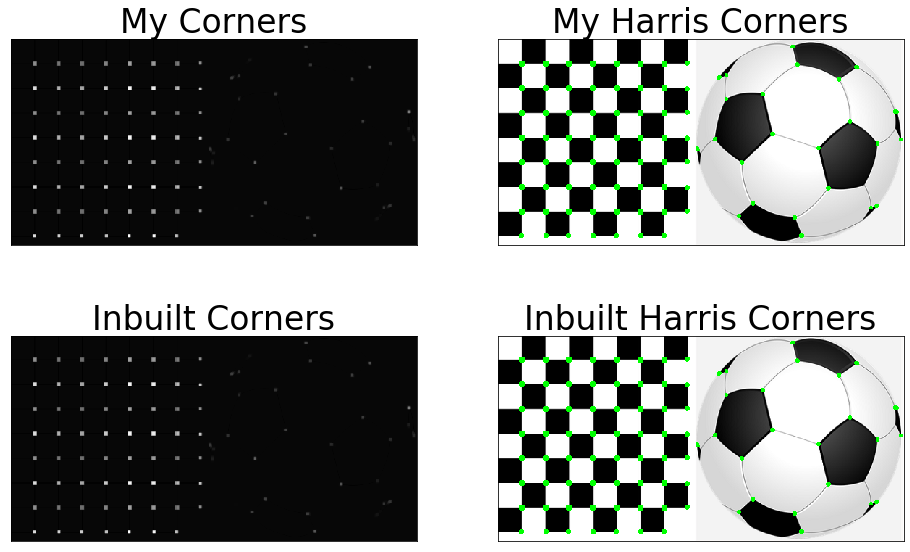

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def find_harris_corners(input_img, k, window_size):
    
    img_corner_list = np.zeros(input_img.shape)
    
    offset = int(window_size/2)
    y_range = input_img.shape[0] - offset
    x_range = input_img.shape[1] - offset
    
#     Sobel filter to find gradient
    dx=cv2.Sobel(input_img,cv2.CV_64F,1,0,ksize=3)
    dy=cv2.Sobel(input_img,cv2.CV_64F,0,1,ksize=3)
    
    Ixx = dx**2
    Ixy = dy*dx
    Iyy = dy**2
    
    for y in range(offset, y_range):
        for x in range(offset, x_range):
            
#             Values of sliding window
            start_y = y - offset
            end_y = y + offset + 1
            start_x = x - offset
            end_x = x + offset + 1
            
#             Extracting the required winow 
            windowIxx = Ixx[start_y : end_y, start_x : end_x]
            windowIxy = Ixy[start_y : end_y, start_x : end_x]
            windowIyy = Iyy[start_y : end_y, start_x : end_x]
            
#             Sum of squares of intensities of partial derevatives 
            Sum_xx = np.sum(windowIxx)
            Sum_xy = np.sum(windowIxy)
            Sum_yy = np.sum(windowIyy)

#            Calculating determinant and trace of the matrix
            det = (Sum_xx * Sum_yy) - (Sum_xy**2)
            trace = Sum_xx + Sum_yy
            
#             Calculating r for Harris Corner equation
            r = det - k*(trace**2)
            img_corner_list[y,x]=r
    
    return img_corner_list


img = cv2.imread('images/corner_test.png')
input_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

k = 0.02
window_size = 3

img_corner_list = find_harris_corners(input_img, k, window_size)
img_corner_list = cv2.dilate(img_corner_list,None)

# Form the list of corner items, finding the max and setting threshold as 1% of max
thresh = 0.1*img_corner_list.max()
corner_img1 = img.copy()

# Marking the final corner items after applying threshold
for j in range(0, img_corner_list.shape[0]):
    for i in range(0, img_corner_list.shape[1]):
        if(img_corner_list[j,i] > thresh):
            cv2.circle(corner_img1, (i, j), 1, (0,255,0), 1)


# Library Function
image_copy = img.copy()
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

dst = cv2.cornerHarris(gray, 3, 3, 0.02)
dst = cv2.dilate(dst,None)

thresh = 0.1*dst.max()
corner_image = img.copy()

for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            cv2.circle( corner_image, (i, j), 1, (0,255,0), 1)
            

#  Printing
plt.figure(figsize=(16,10))
plt.subplot(2, 2, 1)
plt.title("My Corners", fontsize=33)
plt.imshow(img_corner_list, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 2)
plt.title("My Harris Corners", fontsize=33)
plt.imshow(corner_img1)
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 3)
plt.title("Inbuilt Corners", fontsize=33)
plt.imshow(dst,cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 4)
plt.title("Inbuilt Harris Corners", fontsize=33)
plt.imshow(corner_image)
plt.xticks([])
plt.yticks([])
          

<span style='color:red'>
5Q. Write a program to perform robust image matching using RANSAC algorithm and Harris Corner
features. Use FM_img1.jpg and FM_img2.jpg to test the program.
</span>

Inlier ratio changed to:  0.003933136676499509
Inlier ratio changed to:  0.6705998033431662
Inlier ratio changed to:  0.9233038348082596
Inlier ratio changed to:  0.9262536873156342
Inlier ratio changed to:  0.928220255653884


([], <a list of 0 Text yticklabel objects>)

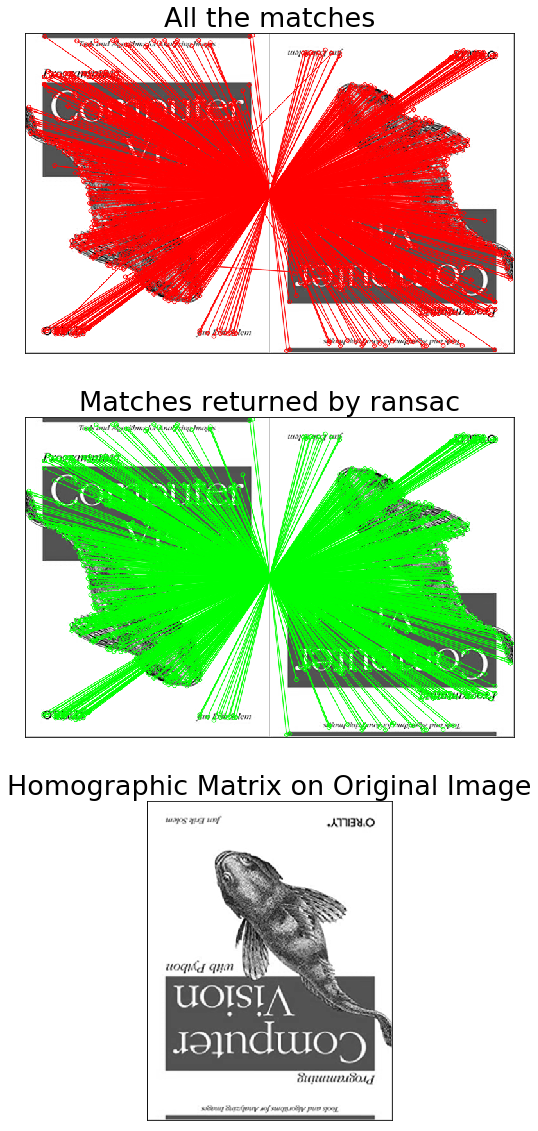

In [7]:
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def ransac(corrs,thresh_ratio=0.955,thresh_inlier=0.1,maxiters=10000):
    
    corrs_copy = np.asarray(corrs)
    src = corrs_copy[:,np.newaxis,:2]
    dest = corrs_copy[:,np.newaxis,2:]
    max_inlier_ratio = 0
    max_homo = None
    max_inlier_mask = []
    
    for _ in range(maxiters):
#         Selecting any 4 random points
        corrs_subset = random.choices(corrs,k=4)
        corrs_subset = np.array(corrs_subset,dtype='float32')
        start = corrs_subset[:,np.newaxis,:2]
        end = corrs_subset[:,np.newaxis,2:]
        
#         Finding homography matrix for those 4 points
        homo,m = cv2.findHomography(start,end)
        
#         corrs_subset = random.choices(corrs,k=3)
#         corrs_subset = np.array(corrs_subset,dtype='float32')
#         start = corrs_subset[:,np.newaxis,:2]
#         end = corrs_subset[:,np.newaxis,2:]
#         homo = cv2.getAffineTransform(start,end)
        
#       Applying the matrix to all source points to find the predicted destination 
        predicts = cv2.perspectiveTransform(src,homo)
    
#     Calculating error using euclidian distance 
        euclid_dist = np.sqrt(np.sum((predicts - dest) ** 2, axis=(1, 2)))
        curr_inlier_ratio = np.mean(euclid_dist<=thresh_inlier)
        
#         better prediction than what was stored so, updating the values
        if max_inlier_ratio < curr_inlier_ratio:
            max_inlier_ratio = curr_inlier_ratio
            max_homo = homo
            print('Inlier ratio changed to: ',curr_inlier_ratio)
            max_inlier_mask = euclid_dist<=thresh_inlier
        
#         got the required threshold so quiting
        if max_inlier_ratio > thresh_ratio:
            break
        
    return max_homo,max_inlier_mask

#input image
img1 = cv2.imread('images/FM_img1.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

img2 = cv2.imread('images/FM_img2.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

# Finding feature points using SIFT
sift=cv2.xfeatures2d.SIFT_create()
kp1, ds1 = sift.detectAndCompute(img1, None)
kp2, ds2 = sift.detectAndCompute(img2, None)

# Matching the feature points using there descriptors
matcher = cv2.BFMatcher(cv2.NORM_L2, True)
matches = matcher.match(ds1, ds2)
correspondenceList = []

for match in matches:
    (x1, y1) = kp1[match.queryIdx].pt
    (x2, y2) = kp2[match.trainIdx].pt
    correspondenceList.append([x1, y1, x2, y2])
    
# Ransac Function
homo,mask_max = ransac(correspondenceList)
mask_max = mask_max.ravel().tolist()

# Printing
draw_params = dict(matchColor=(255, 0, 0),  # draw matches in green color
                    singlePointColor=None,
                    flags=2)
draw_params2 = dict(matchColor=(0, 255, 0),  # draw matches in green color
                    singlePointColor=None,
                    matchesMask=mask_max,
                    flags=2)

img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, **draw_params)
img4 = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, **draw_params2)
img5 = cv2.warpPerspective(img1, homo, (img2.shape[1],img3.shape[0]))


plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
plt.imshow(img3)
plt.title("All the matches", fontsize=27)
plt.xticks([])
plt.yticks([])

plt.subplot(3,1,2)
plt.imshow(img4)
plt.title("Matches returned by ransac", fontsize=27)
plt.xticks([])
plt.yticks([])

plt.subplot(3,1,3)
plt.imshow(img5, cmap='gray')
plt.title("Homographic Matrix on Original Image", fontsize=27)
plt.xticks([])
plt.yticks([])